# ESG vs. Standard ETF Performance Analysis

This notebook compares the performance of an ESG ETF (ESGU) against a standard S&P 500 ETF (SPY) to evaluate whether incorporating environmental, social, and governance factors affects investment returns.

## Analysis Includes:
- Historical price data comparison
- Cumulative returns over time
- Risk metrics (volatility, standard deviation)
- Return distributions (daily, monthly, annual)
- Performance statistics (mean, median, min/max returns)
- Risk-adjusted performance (Sharpe ratio)

The analysis examines whether ESG investing provides comparable returns to traditional index investing, with a focus on both performance and risk characteristics.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import yfinance as yf

In [3]:
tickers = ['ESGU', 'SPY']
df = yf.download(tickers, start='2016-01-01', end='2025-01-01')['Close']
df.index = pd.to_datetime(df.index)

print(df.head())
print()
print(df.info())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed

Ticker      ESGU         SPY
Date                        
2016-01-04   NaN  171.855942
2016-01-05   NaN  172.146545
2016-01-06   NaN  169.975067
2016-01-07   NaN  165.897156
2016-01-08   NaN  164.076172

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2016-01-04 to 2024-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ESGU    2030 non-null   float64
 1   SPY     2264 non-null   float64
dtypes: float64(2)
memory usage: 53.1 KB
None


In [4]:
na_rows = df.isna()
print(f"Number of rows with NaN values: {na_rows.sum()}")

Number of rows with NaN values: Ticker
ESGU    234
SPY       0
dtype: int64


- Some of the rows for ESGU have NaN values, because ESGU wasn't on the market yet, let's then delete them

In [5]:
df = df.dropna()

In [6]:
returns_df = df.pct_change().dropna()
print(returns_df.head())

Ticker          ESGU       SPY
Date                          
2016-12-07  0.000000  0.013081
2016-12-08  0.000000  0.002449
2016-12-09  0.000000  0.006040
2016-12-12  0.000000 -0.001148
2016-12-13  0.029216  0.006674


In [7]:
print(df.head(10))

Ticker           ESGU         SPY
Date                             
2016-12-06  42.527084  192.471313
2016-12-07  42.527084  194.988953
2016-12-08  42.527084  195.466476
2016-12-09  42.527084  196.647171
2016-12-12  42.527084  196.421417
2016-12-13  43.769562  197.732391
2016-12-14  43.769562  196.100204
2016-12-15  43.769562  196.907608
2016-12-16  43.769562  196.522461
2016-12-19  43.769562  196.950363


- Seems like there werent much volatility at the start of ESGU, but the data is still valid

Ticker          ESGU       SPY
Date                          
2016-12-07  1.000000  1.013081
2016-12-08  1.000000  1.015562
2016-12-09  1.000000  1.021696
2016-12-12  1.000000  1.020523
2016-12-13  1.029216  1.027334
Ticker          ESGU       SPY
Date                          
2024-12-24  3.092456  3.114732
2024-12-26  3.091989  3.114940
2024-12-27  3.058535  3.082150
2024-12-30  3.026251  3.046978
2024-12-31  3.013619  3.035893


<Axes: xlabel='Date'>

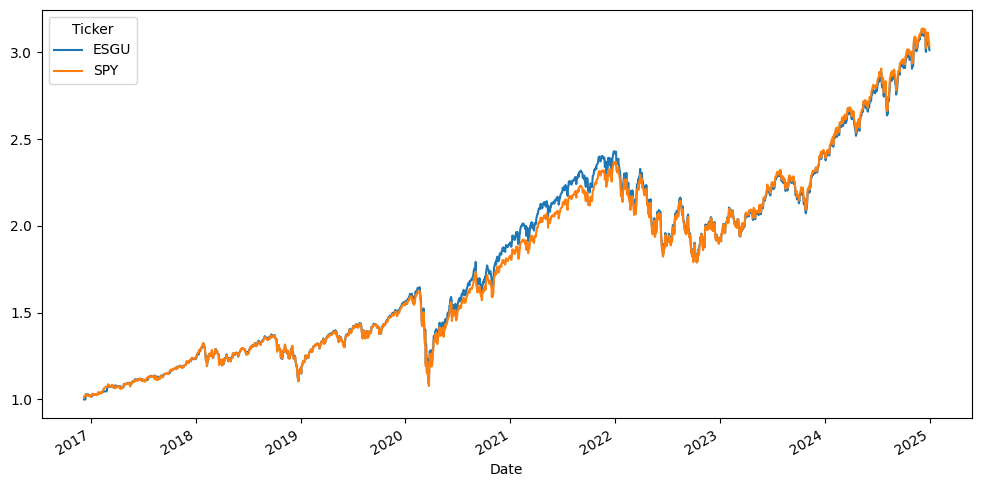

In [8]:
cumulative_returns = (1 + returns_df).cumprod()

print(cumulative_returns.head())
print(cumulative_returns.tail())

cumulative_returns.plot(figsize=(12, 6))

In [9]:
end_value = cumulative_returns.iloc[-1]
print(f"End value of ESGU: {end_value['ESGU']:.2f}")
print(f"End value of SPY: {end_value['SPY']:.2f}")

End value of ESGU: 3.01
End value of SPY: 3.04


- Over the past 9 years there seem to be almost no difference in returns of ESG vs non-ESG ETFs

In [10]:
standard_deviation = returns_df.std() * (252 ** 0.5)  # Annualized standard deviation
print(f"Standard deviation of ESGU: {standard_deviation['ESGU']:.4f}")
print(f"Standard deviation of SPY: {standard_deviation['SPY']:.4f}")
print()

mean_returns = returns_df.mean()*100
print(f"Mean daily returns of ESGU (%): {mean_returns['ESGU']:.4f}")
print(f"Mean daily returns of SPY (%): {mean_returns['SPY']:.4f}")
print()

median_returns = returns_df.median()*100
print(f"Median daily returns of ESGU (%): {median_returns['ESGU']:.4f}")
print(f"Median daily returns of SPY (%): {median_returns['SPY']:.4f}")
print()

min_returns = returns_df.min()*100
print(f"Minimum daily returns of ESGU (%): {min_returns['ESGU']:.4f}")
print(f"Minimum daily returns of SPY (%): {min_returns['SPY']:.4f}")
print()

max_returns = returns_df.max()*100
print(f"Maximum daily returns of ESGU (%): {max_returns['ESGU']:.4f}")
print(f"Maximum daily returns of SPY (%): {max_returns['SPY']:.4f}")


Standard deviation of ESGU: 0.1875
Standard deviation of SPY: 0.1830

Mean daily returns of ESGU (%): 0.0614
Mean daily returns of SPY (%): 0.0614

Median daily returns of ESGU (%): 0.0331
Median daily returns of SPY (%): 0.0727

Minimum daily returns of ESGU (%): -12.0027
Minimum daily returns of SPY (%): -10.9424

Maximum daily returns of ESGU (%): 9.6939
Maximum daily returns of SPY (%): 9.0603


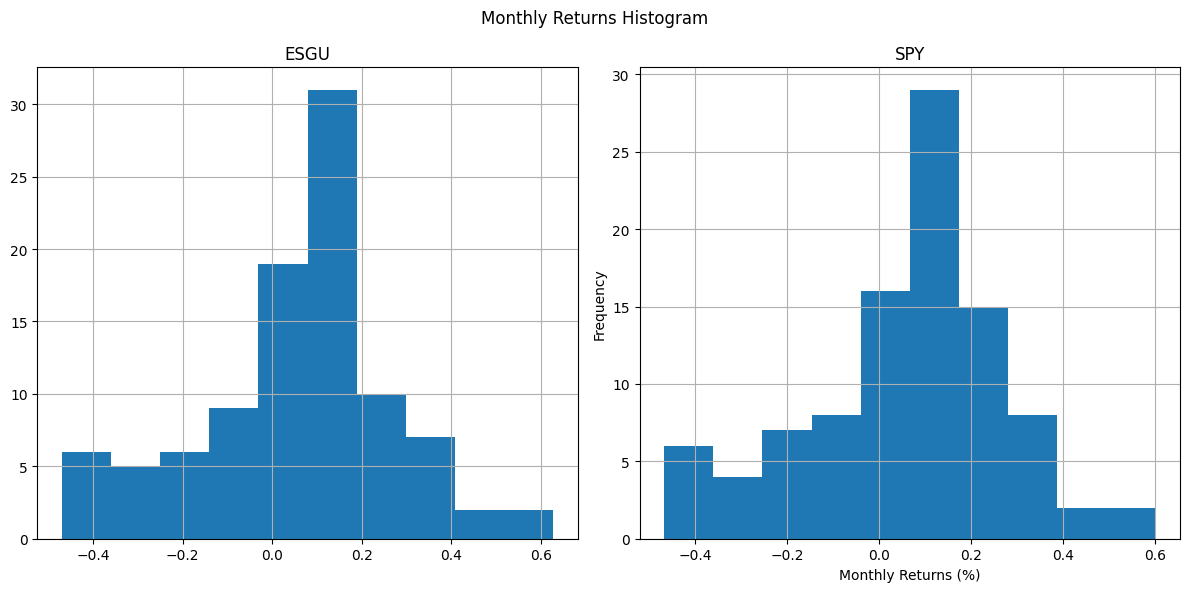

In [11]:
monthly_returns = returns_df.resample('ME').mean()
monthly_returns = monthly_returns * 100  # Convert to percentage

monthly_returns.hist(bins=10, figsize=(12, 6), layout=(1, 2))
plt.suptitle('Monthly Returns Histogram')
plt.xlabel('Monthly Returns (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


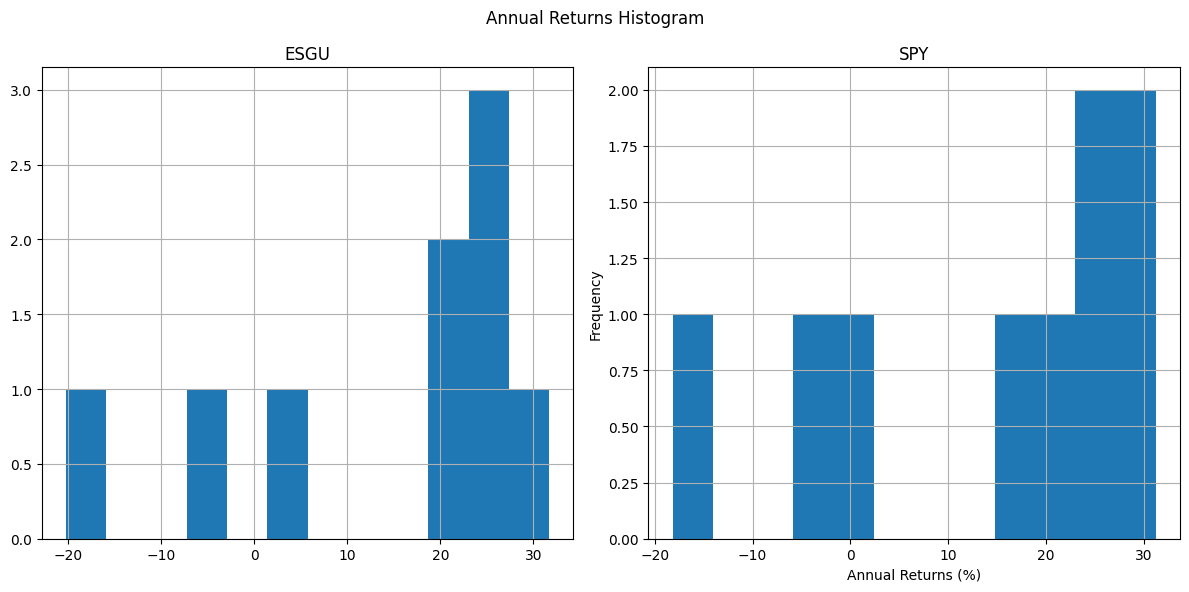

In [12]:
annual_returns = returns_df.resample('YE').apply(lambda x: (1 + x).prod() - 1)
annual_returns = annual_returns * 100  # Convert to percentage	

annual_returns.hist(bins=12, figsize=(12, 6), layout=(1, 2))
plt.suptitle('Annual Returns Histogram')
plt.xlabel('Annual Returns (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
risk_free_rate = 0.01  # Example risk-free rate of 1%

sharpe_ratio = (mean_returns - risk_free_rate) / standard_deviation
print(f"Sharpe Ratio of ESGU: {sharpe_ratio['ESGU']:.4f}")
print(f"Sharpe Ratio of SPY: {sharpe_ratio['SPY']:.4f}")

Sharpe Ratio of ESGU: 0.2740
Sharpe Ratio of SPY: 0.2810


In [16]:
t_stat, p_value = ttest_ind(returns_df['ESGU'].dropna(), returns_df['SPY'].dropna())
p_value


np.float64(0.9993668766770546)

## Statistical Significance Test Results

The p-value obtained from the t-test is **0.999**, which is extremely high (close to 1.0). This means:

- **No Statistical Difference**: There is no statistically significant difference between the daily returns of ESGU and SPY
- **Null Hypothesis**: We fail to reject the null hypothesis that the mean returns of both ETFs are equal
- **Practical Interpretation**: The ESG ETF (ESGU) and the standard S&P 500 ETF (SPY) have statistically identical performance over the analyzed period

With a p-value of 0.999 (much higher than the typical significance threshold of 0.05), we can conclude that any observed differences in returns between the two ETFs are likely due to random variation rather than systematic differences in their underlying strategies.

This supports our earlier observation that ESG investing, as represented by ESGU, does not significantly impact returns compared to traditional index investing represented by SPY.